In [1]:
import numpy as np

from pol_analysis.polData import PolData
from pol_analysis.runPhot import RunPhot
from pol_analysis.getStokes import GetStokes

In [2]:
w0019 = PolData("W0019-1046","R_SPECIAL")

In [3]:
phot = RunPhot(w0019, force_new=True)
phot.subtract_background(box_size=(25,25))
phot.get_source_positions(box_size=5)
phot.get_phot(r_ap=1.0, resubtract_background=False)
#phot.get_phot(resubtract_background=True)

Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.1.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.2.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.3.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.4.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.5.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.6.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.7.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.8.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60202.R_SPECIAL.chip1.1.fits
Subtracting the background for image  science_reduced_img.W0019-1046.60202.R_SPECIAL.chip1.2.fits
Subtracting the back

Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.1.fits. Reverting to reference position.
Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.2.fits. Reverting to reference position.
Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.3.fits. Reverting to reference position.
Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.4.fits. Reverting to reference position.
Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.5.fits. Reverting to reference position.
Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.6.fits. Reverting to reference position.
Could not recenter o-beam position for source 48 in file science_reduced_img.W0019-1046.60201.

In [4]:
stk_obj = GetStokes(w0019)
#stk_obj.get_pol()
stk_obj.get_pol(ob_ids=w0019.ob_pairs['OB_ID'][0:1], mjds=w0019.ob_pairs['MJD_folder'][0:1])
#stk_obj.get_pol(ob_ids=w0019.ob_pairs['OB_ID'][1:2], mjds=w0019.ob_pairs['MJD_folder'][1:2])

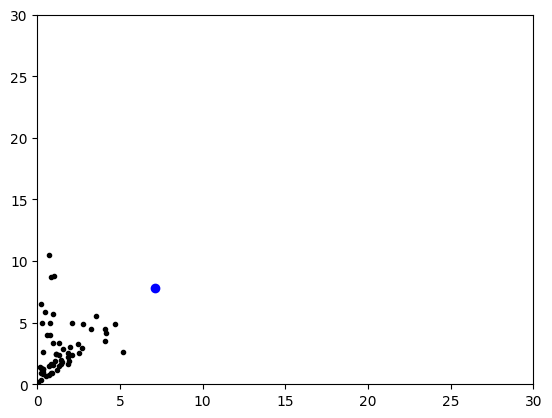

In [14]:
import matplotlib.pyplot as plt
# plt.plot(stk_obj.epol_frac*100, stk_obj.pol_frac*100, 'k.')
# plt.plot(stk_obj.epol_frac[6]*100, stk_obj.pol_frac[6]*100, 'bo')
# plt.xlim([0,30])
# plt.ylim([0,30])
plt.plot(stk_obj.pol_frac*100, stk_obj.pol_frac/stk_obj.epol_frac, 'k.')
plt.plot(stk_obj.pol_frac[6]*100, stk_obj.pol_frac[6]/stk_obj.epol_frac[6], 'bo')
plt.xlim([0,30])
plt.ylim([0,30])
plt.show()

In [6]:
epos = [None]*8
opos = [None]*8
for i in range(8):
    epos[i] = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.epos".format(i+1))
    opos[i] = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.opos".format(i+1))
    if i>0:
        epos[i] -= epos[0]
    opos[i] -= epos[0]
    opos[i][:,1] -= 90
for j in range(len(stk_obj.pol_frac)):
    str = "{:5.2f} {:5.2f} ".format(stk_obj.pol_frac[j]*100., stk_obj.epol_frac[j]*100.)
    str += "{:5.2f} {:5.2f} ".format(stk_obj.Q[j]*100., stk_obj.dQ[j]*100.)
    str += "{:5.2f} {:5.2f} ".format(stk_obj.U[j]*100., stk_obj.dU[j]*100.)
    for i in range(len(epos)):
        str += "{:6.1f} {:6.1f} ".format(epos[i][j,0],epos[i][j,1])
        str += "{:6.1f} {:6.1f} ".format(opos[i][j,0],opos[i][j,1])
    print(str)

 0.60  0.15 -0.19  0.15 -0.56  0.15 1035.1   30.0    0.0   -0.0   -0.0   -0.2    0.0   -0.1   -0.0   -0.2   -0.0   -0.1   -0.0   -0.2   -0.0   -0.0   -0.0   -0.2   -0.0   -0.0   -0.1   -0.2   -0.0   -0.0   -0.0   -0.2   -0.0   -0.1   -0.0   -0.2   -0.0   -0.0 
 0.20  0.16  0.20  0.20  0.01  0.21 1143.7   36.5    0.2    0.0    0.2   -0.2    0.2    0.1    0.2   -0.2    0.2    0.1    0.2   -0.3    0.2   -0.1    0.2   -0.3    0.3   -0.0    0.2   -0.3    0.2    0.0    0.2   -0.2    0.2    0.1    0.2   -0.3    0.2   -0.1 
 1.16  0.47 -0.93  0.49  0.69  0.51 1704.2   37.9   -0.0    0.2   -0.1    0.1    0.0    0.2   -0.1    0.0    0.0    0.2   -0.1    0.0   -0.0    0.2   -0.1    0.0   -0.0    0.2   -0.1    0.0   -0.0    0.2   -0.1    0.0    0.0    0.2   -0.2   -0.0   -0.1    0.1 
 1.54  0.04 -1.29  0.04  0.84  0.04 1849.9   45.5    0.2    0.8    0.1    0.3    0.2    0.8    0.1    0.2    0.1    0.8    0.1    0.3    0.2    0.7    0.1    0.3    0.2    0.7    0.1    0.2    0.1    0.8    0.1    0.2

In [7]:
from astropy.io import fits
ths = np.zeros(8)
for i in range(8):

    h = fits.open("../proc/reduced_images/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.fits".format(i+1))
    ths[i] = h[0].header["HIERARCH ESO INS RETA2 ROT"]
    h.close()

    phot = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.{}.phot".format(i+1))
    if i==0:
        fe  = np.zeros((len(ths), phot.shape[0]))
        dfe = np.zeros(fe.shape)
        fo  = np.zeros(fe.shape)
        dfo = np.zeros(fe.shape)
    fe[i]  = phot[:,0]
    dfe[i] = phot[:,1]
    fo[i]  = phot[:,2]
    dfo[i] = phot[:,3]

In [8]:
ths_unique = np.unique(ths)
F = np.zeros((len(ths_unique), fo.shape[1]))
dF = np.zeros(F.shape)
for i, th in enumerate(ths_unique):
    k = np.argwhere(ths==th)
    fo_sum  = np.sum(fo[k], axis=0)
    fe_sum  = np.sum(fe[k], axis=0)
    dfo_sum = np.sum(dfo[k]**2, axis=0)**0.5
    dfe_sum = np.sum(dfe[k]**2, axis=0)**0.5
    F[i] = (fo_sum - fe_sum)/(fo_sum + fe_sum)
    dF[i] = ((2*fe_sum*fo_sum)/(fo_sum+fe_sum)**2) * ((dfo_sum/fo_sum)**2 + (dfe_sum/fe_sum)**2)**0.5


In [9]:
import astropy.units as u
Q = np.zeros(F.shape[1])
U = np.zeros(Q.shape)
dQ = np.zeros(Q.shape)
dU = np.zeros(Q.shape)
for i, th in enumerate(ths_unique):
    Q += (2/len(ths_unique)) * F[i] * np.cos(4*th*u.deg)
    U += (2/len(ths_unique)) * F[i] * np.sin(4*th*u.deg)
    dQ += ((2/len(ths_unique)) * np.cos(4*th*u.deg))**2 * dF[i]**2
    dU += ((2/len(ths_unique)) * np.sin(4*th*u.deg))**2 * dF[i]**2
dQ = dQ**0.5
dU = dU**0.5

In [10]:
epos_ref = np.loadtxt("phot/science_reduced_img.W0019-1046.60201.R_SPECIAL.chip1.1.epos")
Q_back = stk_obj.QU_background(epos_ref[:,0], epos_ref[:,1], "Q", "1")
U_back = stk_obj.QU_background(epos_ref[:,0], epos_ref[:,1], "U", "1")
Q -= Q_back
U -= U_back
dQ -= Q_back
dU -= U_back

In [11]:
P = (Q**2+U**2)**0.5
eP = ((Q*dQ)**2 + (U*dU)**2)**0.5 / P

In [12]:
for i in range(len(Q)):
    print("{:5.2f} {:5.2f} {:5.2f} {:5.2f} {:5.2f} {:5.2f}".format(P[i]*100, eP[i]*100, Q[i]*100, dQ[i]*100, U[i]*100, dU[i]*100))

 0.60  0.12 -0.19  0.13 -0.56  0.12
 0.20  0.15  0.20  0.15  0.01  0.22
 1.16  0.73 -0.93  0.23  0.69  1.18
 1.54  0.61 -1.29 -0.28  0.84  1.04
 1.85  0.84 -1.47  0.82 -1.12  0.88
 0.23  0.10 -0.12  0.08 -0.20  0.10
 7.14  0.90  6.26  0.90 -3.43  0.90
 0.19  0.28 -0.14  0.22 -0.12  0.34
 0.32  0.03 -0.32  0.01 -0.02  0.45
 0.85  0.88 -0.53 -0.10  0.67  1.12
 1.11  0.52 -1.09  0.51  0.18  0.70
 0.98  0.43 -0.15  0.09 -0.96  0.43
 5.18  2.27  4.77  2.24  2.01  2.43
 0.32  0.45  0.17  0.42  0.27  0.46
 0.69  0.62 -0.07  0.57 -0.68  0.62
 0.36  0.37 -0.21  0.36  0.29  0.37
 1.44  1.14 -1.26  1.00  0.69  1.50
 1.55  1.08 -1.26  0.63  0.90  1.63
 0.45  0.08  0.03  0.09 -0.45  0.08
 1.88  1.41 -1.88  1.41  0.08  1.45
 0.34  0.62 -0.25  0.61  0.24  0.63
 0.97  0.92  0.54  0.79  0.80  0.97
 1.31  1.10 -0.85  0.49  1.00  1.39
 0.80  0.60  0.04  0.53 -0.80  0.60
 4.12  1.18 -3.88  1.05  1.38  1.89
 1.16  1.30 -1.04  1.29 -0.52  1.35
 1.89  1.22 -1.62  0.86  0.98  1.88
13.05  0.49  4.52 -0.22 -12.